In [4]:
import numpy as np
import pandas as pd

In [5]:
%matplotlib inline
import os
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

from numpy.random import randn
from matplotlib import pyplot

In [6]:
data = pd.read_csv('/content/diabetes.csv')
# data = pd.read_csv('/Iris.csv')
print (data.shape)
print (data.tail())
print (data.columns)

(768, 9)
     Pregnancies  Glucose  ...  Age  Outcome
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[5 rows x 9 columns]
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.shape

(768, 9)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
data.Outcome.unique()

array([1, 0])

In [12]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

label = ['Outcome']
X = data[features]
y = data[label]

In [13]:
print (y)

     Outcome
0          1
1          0
2          1
3          0
4          1
..       ...
763        0
764        0
765        0
766        1
767        0

[768 rows x 1 columns]


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(X, y, test_size=0.30, random_state=42)
clf_true = RandomForestClassifier(n_estimators=100)
clf_true.fit(X_true_train,y_true_train)

y_true_pred=clf_true.predict(X_true_test)
print("Base Accuracy:",metrics.accuracy_score(y_true_test, y_true_pred))
print("Base classification report:",metrics.classification_report(y_true_test, y_true_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Base Accuracy: 0.7619047619047619
Base classification report:               precision    recall  f1-score   support

           0       0.82      0.82      0.82       151
           1       0.66      0.65      0.65        80

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



In [15]:
X.shape

(768, 8)

In [16]:
data.shape

(768, 9)

In [17]:
print (y_true_test)

     Outcome
668        0
324        0
624        0
690        0
473        0
..       ...
619        1
198        1
538        0
329        0
302        0

[231 rows x 1 columns]


In [18]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

In [19]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = np.zeros((n_samples, 1))
	return X, y

In [20]:
# generate n real samples with class labels
def generate_real_samples(n):
  X = data.sample(n)

  #generate class labels
  y = np.ones((n, 1))
  return X, y

In [21]:
# define the standalone generator model
def define_generator(latent_dim, n_outputs=9):
  model = Sequential()
  model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
  model.add(Dense(30, activation='relu'))
  # model.add(Dense(n_outputs, activation='sigmoid'))
  model.add(Dense(n_outputs, activation='linear'))
  return model

In [22]:
generator1 = define_generator(10, 9)
generator1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                165       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 279       
Total params: 924
Trainable params: 924
Non-trainable params: 0
_________________________________________________________________


In [23]:
# from keras.layers import Reshape
# from keras.layers import Flatten
# from keras.layers import Conv2D
# from keras.layers import Conv2DTranspose
# from keras.layers import LeakyReLU
# from keras.layers import BatchNormalization
# from keras.initializers import RandomNormal
# from matplotlib import pyplot

In [24]:
# define the standalone discriminator model
def define_discriminator(n_inputs=9):
  model = Sequential()
  # model.add(Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer='he_uniform', input_shape=n_inputs))
  # model.add(BatchNormalization())
  # model.add(LeakyReLU(alpha=0.2))
  # model.add(Dense(25, activation='relu'))
  model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
	# compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [25]:
discriminator1 = define_discriminator(9)
discriminator1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 25)                250       
_________________________________________________________________
dense_4 (Dense)              (None, 50)                1300      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [26]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

In [27]:
# create a line plot of loss for the gan and save to file
def plot_history(d_hist, g_hist):
	# plot loss
	plt.subplot(1, 1, 1)
	plt.plot(d_hist, label='d')
	plt.plot(g_hist, label='gen')
	# plt.legend()
	# plot discriminator accuracy
	# pyplot.subplot(2, 1, 2)
	# pyplot.plot(a1_hist, label='acc-real')
	# pyplot.plot(a2_hist, label='acc-fake')
	plt.show()
	# save plot to file
	# plt.savefig('results_baseline/plot_line_plot_loss.png')
	plt.close()

In [28]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128):
  
  # determine half the size of one batch, for updating the discriminator
  half_batch = int(n_batch / 2)

  d_history = []
  g_history = []
  
  # manually enumerate epochs
  for epoch in range(n_epochs):
    # prepare real samples
    x_real, y_real = generate_real_samples(half_batch)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
    # update discriminator
    d_loss_real, d_real_acc = d_model.train_on_batch(x_real, y_real)
    d_loss_fake, d_fake_acc = d_model.train_on_batch(x_fake, y_fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # prepare points in latent space as input for the generator
    x_gan = generate_latent_points(latent_dim, n_batch)
    
    # create inverted labels for the fake samples
    y_gan = np.ones((n_batch, 1))
    
    # update the generator via the discriminator's error
    g_loss_fake = gan_model.train_on_batch(x_gan, y_gan)

    print('>%d, d1=%.3f, d2=%.3f d=%.3f g=%.3f' % (epoch+1, d_loss_real, d_loss_fake, d_loss,  g_loss_fake))
    d_history.append(d_loss)
    g_history.append(g_loss_fake)

  plot_history(d_history, g_history)

    # if i==999:
    #   np.savetxt("new_X.csv", X, delimiter=",")
    
    # evaluate the model every n_eval epochs
    # if (i+1) % n_eval == 0:
    #   summarize_performance(i, g_model, d_model, latent_dim)
  g_model.save('trained_generated_model_20210205_v3.h5')
  
		
  

In [29]:
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	# prepare real samples
	x_real, y_real = generate_real_samples(n)
	# evaluate discriminator on real examples
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print(epoch, acc_real, acc_fake)
  # scatter plot real and fake data points
	pyplot.scatter(x_real[:, 0], color='red')
	pyplot.scatter(x_fake[:, 0], color='blue')
	pyplot.show()

Streaming output truncated to the last 5000 lines.
>5001, d1=0.373, d2=0.701 d=0.537 g=1.492
>5002, d1=0.418, d2=0.407 d=0.412 g=1.667
>5003, d1=0.466, d2=0.363 d=0.415 g=1.647
>5004, d1=0.373, d2=0.466 d=0.420 g=1.725
>5005, d1=0.446, d2=0.353 d=0.400 g=1.719
>5006, d1=0.342, d2=0.354 d=0.348 g=1.774
>5007, d1=0.440, d2=0.342 d=0.391 g=1.666
>5008, d1=0.376, d2=0.339 d=0.358 g=1.552
>5009, d1=0.342, d2=0.355 d=0.349 g=1.597
>5010, d1=0.349, d2=0.362 d=0.356 g=1.719
>5011, d1=0.402, d2=0.313 d=0.358 g=1.836
>5012, d1=0.383, d2=0.302 d=0.343 g=1.709
>5013, d1=0.413, d2=0.287 d=0.350 g=1.573
>5014, d1=0.376, d2=0.376 d=0.376 g=1.355
>5015, d1=0.351, d2=0.555 d=0.453 g=1.291
>5016, d1=0.374, d2=0.486 d=0.430 g=1.693
>5017, d1=0.563, d2=0.398 d=0.481 g=1.738
>5018, d1=0.674, d2=0.500 d=0.587 g=1.405
>5019, d1=0.533, d2=0.486 d=0.510 g=1.354
>5020, d1=0.446, d2=0.594 d=0.520 g=1.514
>5021, d1=0.619, d2=0.461 d=0.540 g=1.559
>5022, d1=0.572, d2=0.401 d=0.487 g=1.617
>5023, d1=0.642, d2=0.483

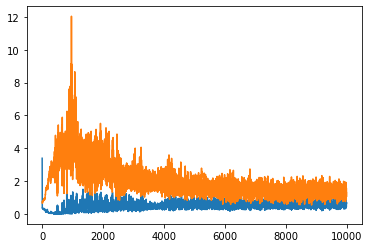

In [30]:
# size of the latent space
latent_dim = 10
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

In [31]:
from keras.models import load_model
model = load_model('/content/trained_generated_model_20210205_v3.h5')

In [32]:
latent_points = generate_latent_points(10, 750)

In [33]:
X = model.predict(latent_points)

In [34]:
data_fake = pd.DataFrame(data=X,  columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [35]:
data_fake.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3.042421,84.372429,41.264584,15.499371,75.576080,16.862654,0.643298,30.715979,0.131986
1,2.379814,65.569473,34.632591,9.681239,153.032700,14.792008,0.301202,11.963096,-0.200955
2,-0.212970,104.455383,40.059303,9.538709,0.783831,20.410034,0.439094,13.447835,0.229936
3,12.437524,257.148895,125.773453,2.465484,1.408619,50.760799,0.756833,113.432060,0.949813
4,3.571342,34.856190,30.242983,17.523539,1.804614,18.132822,0.289309,23.509460,-0.023842


In [36]:
data_fake.Outcome.min()

-0.6040102243423462

In [37]:
data_fake.Outcome.max()

1.2264792919158936

In [38]:
outcome_mean = data_fake.Outcome.mean()

In [39]:
data_fake['Outcome'] = data_fake['Outcome'] > outcome_mean

In [40]:
data_fake['Outcome']

0       True
1      False
2       True
3       True
4      False
       ...  
745    False
746    False
747     True
748    False
749    False
Name: Outcome, Length: 750, dtype: bool

In [41]:
data_fake["Outcome"] = data_fake["Outcome"].astype(int)

In [42]:
data_fake.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3.042421,84.372429,41.264584,15.499371,75.576080,16.862654,0.643298,30.715979,1
1,2.379814,65.569473,34.632591,9.681239,153.032700,14.792008,0.301202,11.963096,0
2,-0.212970,104.455383,40.059303,9.538709,0.783831,20.410034,0.439094,13.447835,1
3,12.437524,257.148895,125.773453,2.465484,1.408619,50.760799,0.756833,113.432060,1
4,3.571342,34.856190,30.242983,17.523539,1.804614,18.132822,0.289309,23.509460,0


In [43]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

label = ['Outcome']
X_fake_created = data_fake[features]
y_fake_created = data_fake[label]

In [60]:
X_fake_train, X_fake_test, y_fake_train, y_fake_test = train_test_split(X_fake_created, y_fake_created, test_size=0.30, random_state=42)
clf_fake = RandomForestClassifier(n_estimators=100)
clf_fake.fit(X_fake_train,y_fake_train)

y_fake_pred=clf_fake.predict(X_fake_test)
print("Accuracy of fake data model:",metrics.accuracy_score(y_fake_test, y_fake_pred))
print("Classification report of fake data model:",metrics.classification_report(y_fake_test, y_fake_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy of fake data model: 0.88
Classification report of fake data model:               precision    recall  f1-score   support

           0       0.86      0.94      0.90       127
           1       0.92      0.80      0.85        98

    accuracy                           0.88       225
   macro avg       0.89      0.87      0.88       225
weighted avg       0.88      0.88      0.88       225



In [45]:
X_final = X[:, :8]
print ('X_final: ', X_final[:3])

y_final = X[:, :]
print ('y_final: ', y_final[:3])

X_final:  [[  3.042421    84.37243     41.264584    15.499371    75.57608
   16.862654     0.64329785  30.715979  ]
 [  2.3798137   65.56947     34.63259      9.681239   153.0327
   14.792008     0.30120233  11.963096  ]
 [ -0.21297021 104.45538     40.059303     9.538709     0.78383124
   20.410034     0.43909413  13.447835  ]]
y_final:  [[ 3.0424211e+00  8.4372429e+01  4.1264584e+01  1.5499371e+01
   7.5576080e+01  1.6862654e+01  6.4329785e-01  3.0715979e+01
   1.3198617e-01]
 [ 2.3798137e+00  6.5569473e+01  3.4632591e+01  9.6812391e+00
   1.5303270e+02  1.4792008e+01  3.0120233e-01  1.1963096e+01
  -2.0095479e-01]
 [-2.1297021e-01  1.0445538e+02  4.0059303e+01  9.5387087e+00
   7.8383124e-01  2.0410034e+01  4.3909413e-01  1.3447835e+01
   2.2993585e-01]]


In [46]:
X = X [:,:8]

In [47]:
y_fake_pred = clf_true.predict(X)

In [48]:
y_fake_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [49]:
!pip install table_evaluator

  Created wheel for table-evaluator: filename=table_evaluator-1.2.2.post1-cp36-none-any.whl size=17055 sha256=b8073e72d8fb77d4d9508ab7ee9c622d1f7a9dec0e45a8294745f8093ded376e
  Stored in directory: /root/.cache/pip/wheels/a9/4d/9d/62b61486fc85b53ef9bf7979a52cda067a514c2a7a05c49bd4
Successfully built table-evaluator


In [50]:
data_fake.shape

(750, 9)

In [51]:
data.shape

(768, 9)

In [52]:
data_fake.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3.042421,84.372429,41.264584,15.499371,75.576080,16.862654,0.643298,30.715979,1
1,2.379814,65.569473,34.632591,9.681239,153.032700,14.792008,0.301202,11.963096,0
2,-0.212970,104.455383,40.059303,9.538709,0.783831,20.410034,0.439094,13.447835,1
3,12.437524,257.148895,125.773453,2.465484,1.408619,50.760799,0.756833,113.432060,1
4,3.571342,34.856190,30.242983,17.523539,1.804614,18.132822,0.289309,23.509460,0


In [53]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
from table_evaluator import load_data, TableEvaluator

In [55]:
table_evaluator = TableEvaluator(data, data_fake)

In [56]:
table_evaluator.evaluate(target_col='Outcome')


Correlation metric: pearsonr

Classifier F1-scores and their Jaccard similarities:
                                     f1_real  f1_fake  jaccard_similarity
index                                                                    
LogisticRegression_real_testset       0.7600   0.5600              0.4851
LogisticRegression_fake_testset       0.5800   0.8800              0.4778
RandomForestClassifier_real_testset   0.7400   0.6067              0.4851
RandomForestClassifier_fake_testset   0.6267   0.8533              0.4851
DecisionTreeClassifier_real_testset   0.7067   0.5400              0.3453
DecisionTreeClassifier_fake_testset   0.5933   0.8200              0.4563
MLPClassifier_real_testset            0.7400   0.5333              0.3453
MLPClassifier_fake_testset            0.5933   0.9067              0.3699

Miscellaneous results:
                                         Result
Column Correlation Distance RMSE         0.3641
Column Correlation distance MAE          0.2785
Duplicat

{'1 - MAPE Estimator results': 0.6565597153349305,
 'Basic statistics': 0.9812097812097812,
 'Correlation column correlations': 0.39118132342305334,
 'Mean Correlation between fake and real columns': 0.9358592413514093,
 'Similarity Score': 0.7412025153297936}

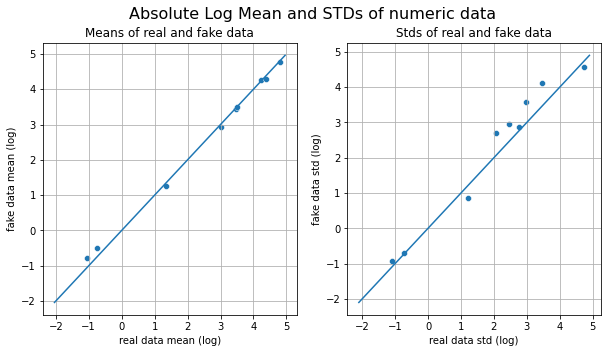

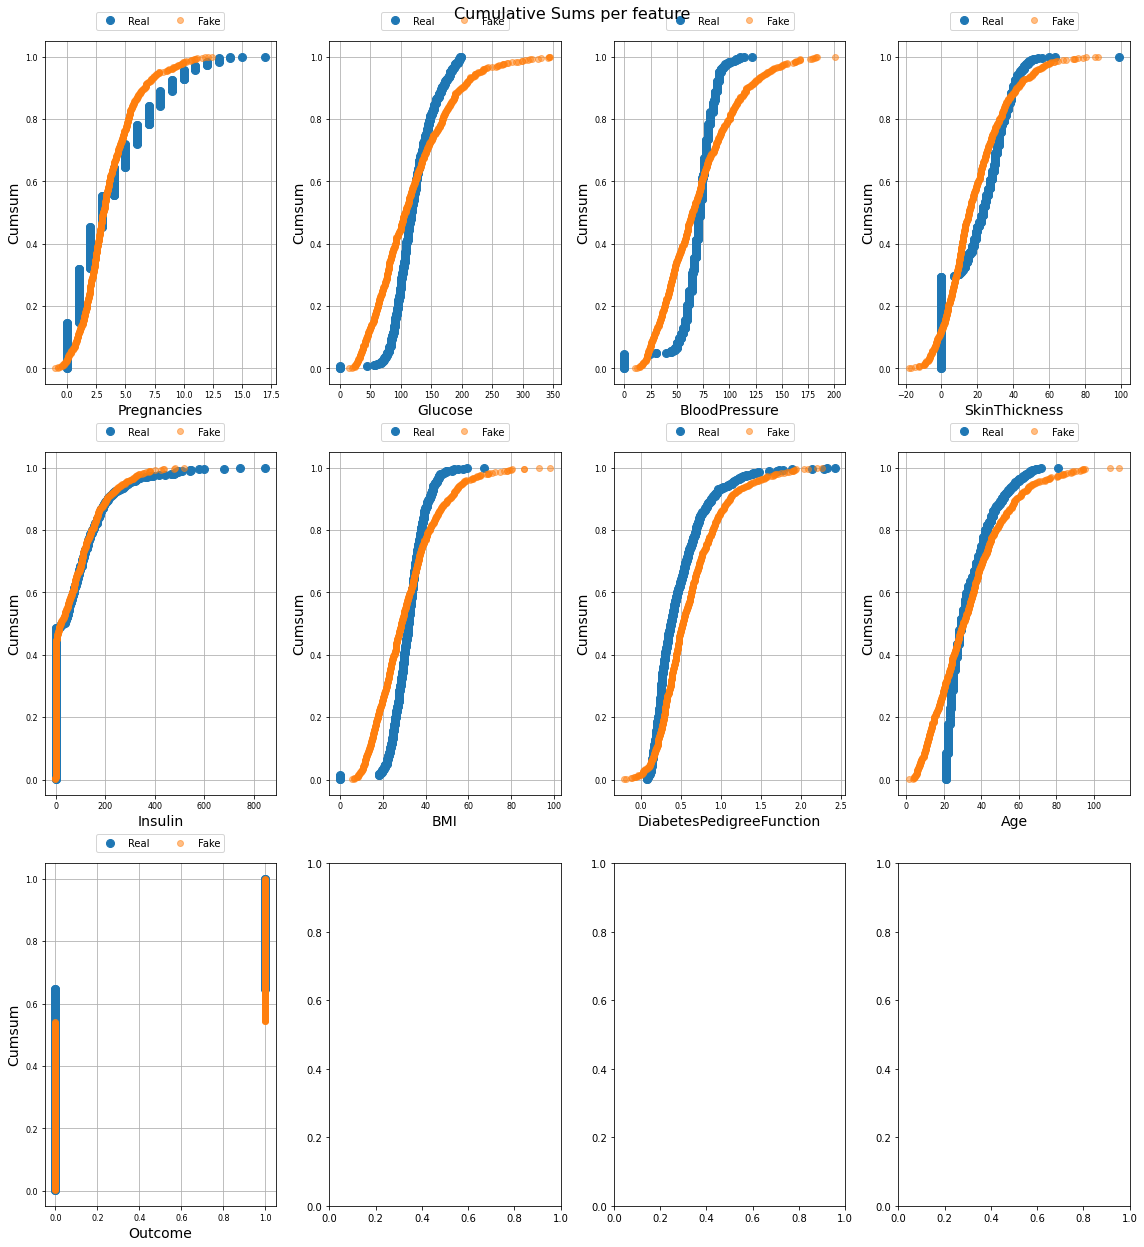

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

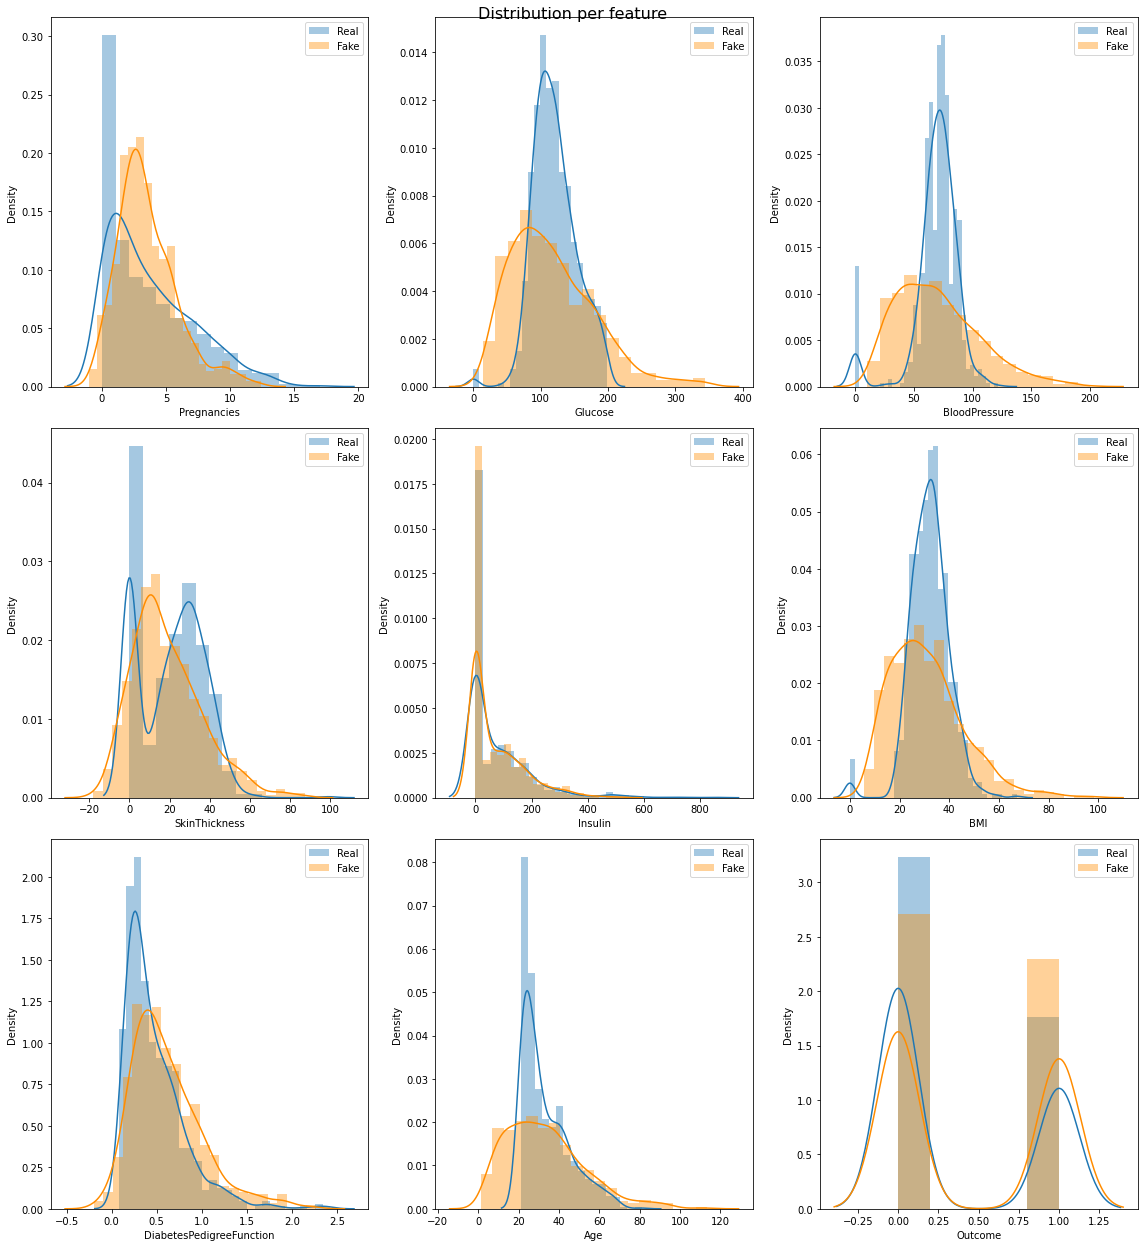

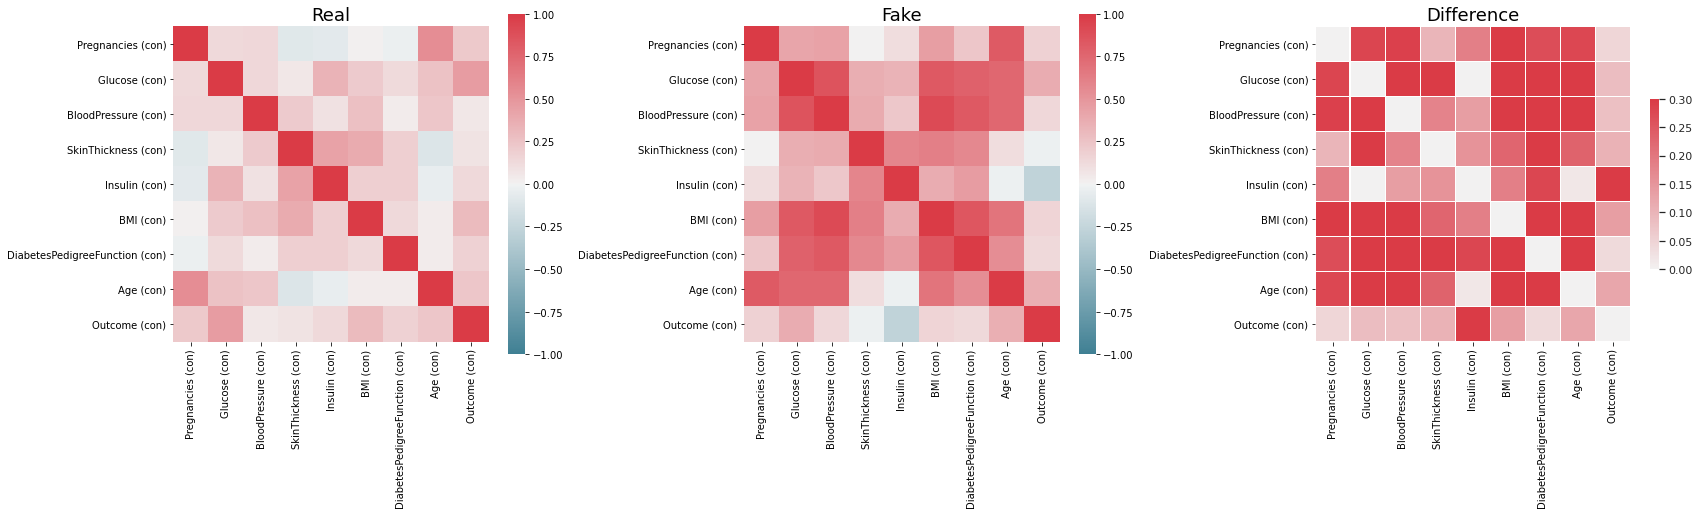

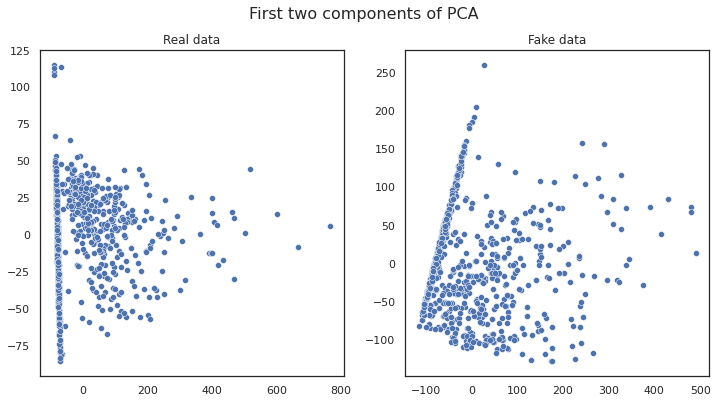

In [57]:
table_evaluator.visual_evaluation()